In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/researchdata/Paper 2_Wear Depth data.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/researchdata/Paper 2_Wear Depth data.xlsx')

In [3]:
df

,Rotation Speed (rpm),Traverse speed (mm/min),Traverse distance (mm),Distance from Shoulder (mm),"Wear depth (average), mm"
0,800.0,30.0,300.0,0.0085,0.244100
1,800.0,30.0,300.0,0.3002,0.286150
2,800.0,30.0,300.0,0.6013,0.319000
3,800.0,30.0,300.0,0.9024,0.328550
4,800.0,30.0,300.0,1.2035,0.361150
...,...,...,...,...,...
236,1000.0,70.0,1000.0,2.7092,0.499550
237,1000.0,70.0,1000.0,3.0009,0.715650
238,1000.0,70.0,1000.0,3.3020,1.032850
239,1000.0,70.0,1000.0,3.5380,1.430650


In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import svm
import seaborn as sns

In [5]:
df.columns

Index(['Rotation Speed (rpm)', 'Traverse speed (mm/min)',
       'Traverse distance (mm)', 'Distance from Shoulder (mm)',
       'Wear depth (average), mm'],
      dtype='object')

# Data Cleaning

In [6]:
df = df.dropna() 

# First let's have a overview of relations between various inputs and output

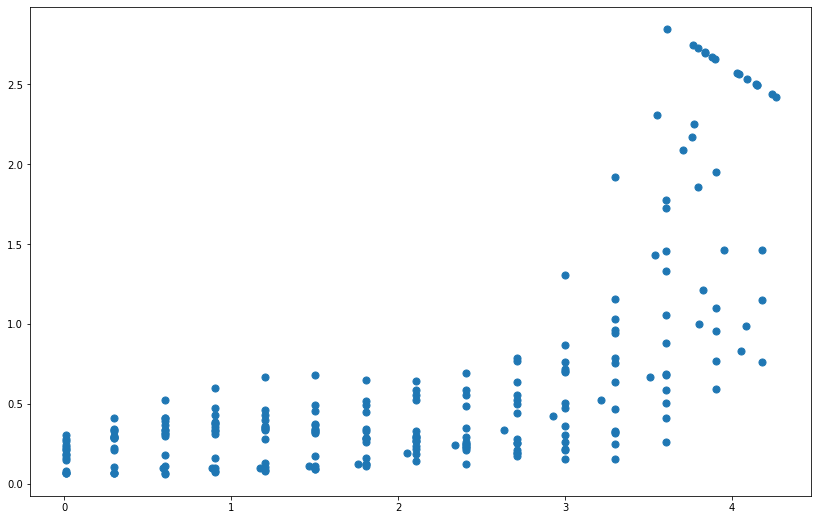

In [7]:
plt.figure(figsize=(14,9))
plt.scatter(x=df['Distance from Shoulder (mm)'], y=df['Wear depth (average), mm'], s=50)

From the above plot, we can colclude that with increase in distance form shoulder, the wear depth is expected to increase, it also depends on other varibales. And we are seeing a rapid rise in wear-depth after distance form should becomes greater than 3 mm

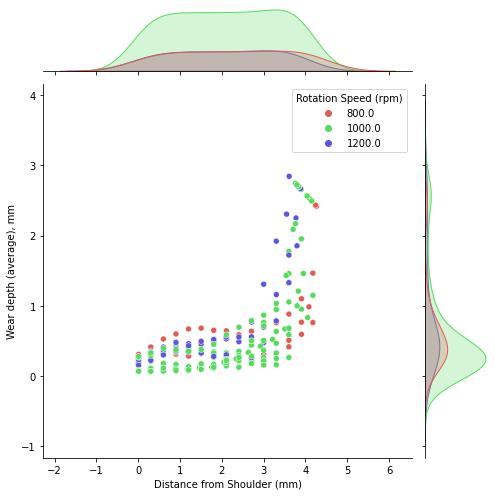

In [8]:
sns.jointplot(x='Distance from Shoulder (mm)', y='Wear depth (average), mm', data=df, hue="Rotation Speed (rpm)", palette=sns.color_palette("hls", 3), height=7)

We also get an interesting observation that, rotating speed around 1000RPM seems ideal, any directional change from here can increase the wear-depth. However the decrease in rotating speed seems more harmful than increase in rotating speed from 1000RPM.

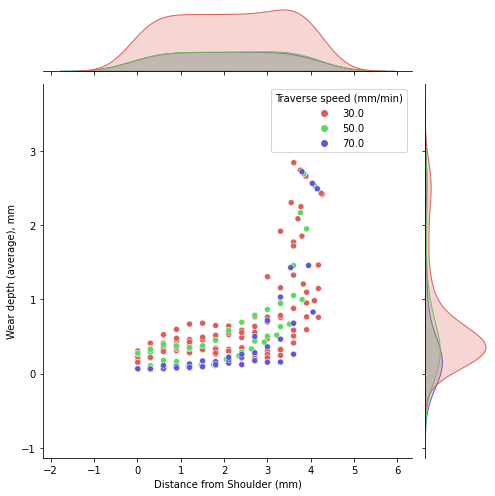

In [9]:
sns.jointplot(x='Distance from Shoulder (mm)', y='Wear depth (average), mm', data=df, hue="Traverse speed (mm/min)", palette=sns.color_palette("hls", 3), height=7)

Here we can see that with increase in transverse speed, the wear depth may decrease

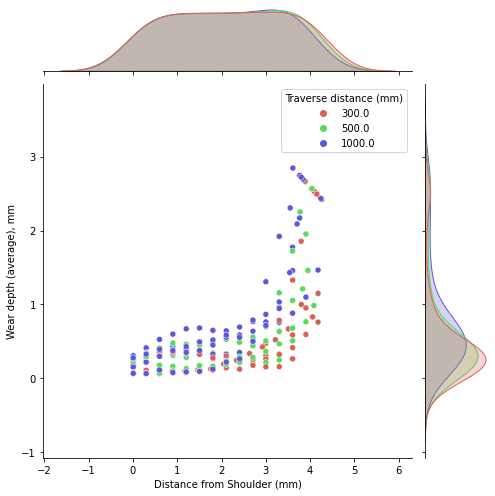

In [10]:
sns.jointplot(x='Distance from Shoulder (mm)', y='Wear depth (average), mm', data=df, hue="Traverse distance (mm)", palette=sns.color_palette("hls", 3), height=7)

It seems that the transvers distance has some strange realtionship with wear depth, however it is clearly seen that, the higher wear depth is seen iwth high traverse distance

### As we are seeing the variation for distance_from_shoulder > 3mm becoming overwhelming, let's first analyze the data upto 3mm

In [11]:
df = df.loc[df['Distance from Shoulder (mm)'] < 3]

In [12]:
df

,Rotation Speed (rpm),Traverse speed (mm/min),Traverse distance (mm),Distance from Shoulder (mm),"Wear depth (average), mm"
0,800.0,30.0,300.0,0.0085,0.24410
1,800.0,30.0,300.0,0.3002,0.28615
2,800.0,30.0,300.0,0.6013,0.31900
3,800.0,30.0,300.0,0.9024,0.32855
4,800.0,30.0,300.0,1.2035,0.36115
...,...,...,...,...,...
232,1000.0,70.0,1000.0,1.5047,0.09340
233,1000.0,70.0,1000.0,1.8058,0.12350
234,1000.0,70.0,1000.0,2.1069,0.21920
235,1000.0,70.0,1000.0,2.4081,0.26215


In [13]:
X = df[['Rotation Speed (rpm)', 'Traverse speed (mm/min)',
       'Traverse distance (mm)', 'Distance from Shoulder (mm)']]
y = df['Wear depth (average), mm']

In [14]:
X

,Rotation Speed (rpm),Traverse speed (mm/min),Traverse distance (mm),Distance from Shoulder (mm)
0,800.0,30.0,300.0,0.0085
1,800.0,30.0,300.0,0.3002
2,800.0,30.0,300.0,0.6013
3,800.0,30.0,300.0,0.9024
4,800.0,30.0,300.0,1.2035
...,...,...,...,...
232,1000.0,70.0,1000.0,1.5047
233,1000.0,70.0,1000.0,1.8058
234,1000.0,70.0,1000.0,2.1069
235,1000.0,70.0,1000.0,2.4081


# Regression and others

# SVM

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [16]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train_svm)

In [18]:
svm = SVR()
svm.fit(X_train_svm, y_train_svm)

SVR()

In [19]:
y_pred_svm = svm.predict(X_test_svm)

In [20]:
mae_svm = metrics.mean_absolute_error(y_test_svm, y_pred_svm)
mae_svm

0.1090886522915497

In [21]:
mad_svm = np.mean(np.abs(y_test_svm - y_pred_svm))
mad_svm

0.1090886522915497

In [22]:
mse_svm = mean_squared_error(y_test_svm, y_pred_svm)
print("Mean Squared Error:", mse_svm)

Mean Squared Error: 0.019197508561450267


R-squared score:  0.18855986105306188


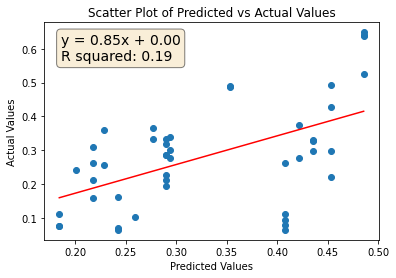

In [23]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(y_pred_svm, y_test_svm)

x = np.linspace(min(y_pred_svm), max(y_pred_svm), 2)
y_svm = slope * x + intercept
plt.plot(x, y_svm, '-r', label='Trend Line')

r2_svm = r2_score(y_test_svm, y_pred_svm)
print("R-squared score: ", r2_svm)

plt.scatter(y_pred_svm, y_test_svm)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.text(0.05, 0.95, f"y = {slope:.2f}x + {intercept:.2f}\nR squared: {r2_svm:.2f}", transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

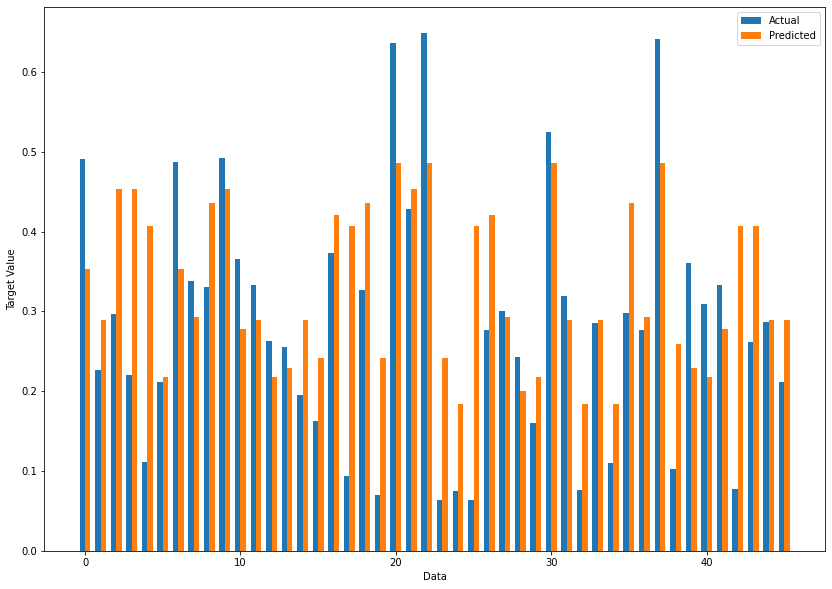

In [24]:
x = np.arange(len(y_test_svm))
width = 0.35
fig, ax = plt.subplots(figsize=(14,10))
rects1 = ax.bar(x - width/2, y_test_svm, width, label='Actual')
rects2 = ax.bar(x + width/2, y_pred_svm, width, label='Predicted')
ax.set_xlabel('Data')
ax.set_ylabel('Target Value')
ax.legend()
plt.show()

# KNN 

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_knn, y_train_knn)

KNeighborsRegressor(n_neighbors=3)

In [28]:
y_pred_knn = knn.predict(X_test_knn)

In [29]:
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
print("Mean Squared Error:", mse_knn)

Mean Squared Error: 0.0029116919384057963


In [30]:
mae_knn = metrics.mean_absolute_error(y_test_knn, y_pred_knn)
mae_knn

0.038321376811594206

In [31]:
mad_knn = np.mean(np.abs(y_test_knn - np.mean(y_pred_knn)))
mad_knn

0.11979283238815372

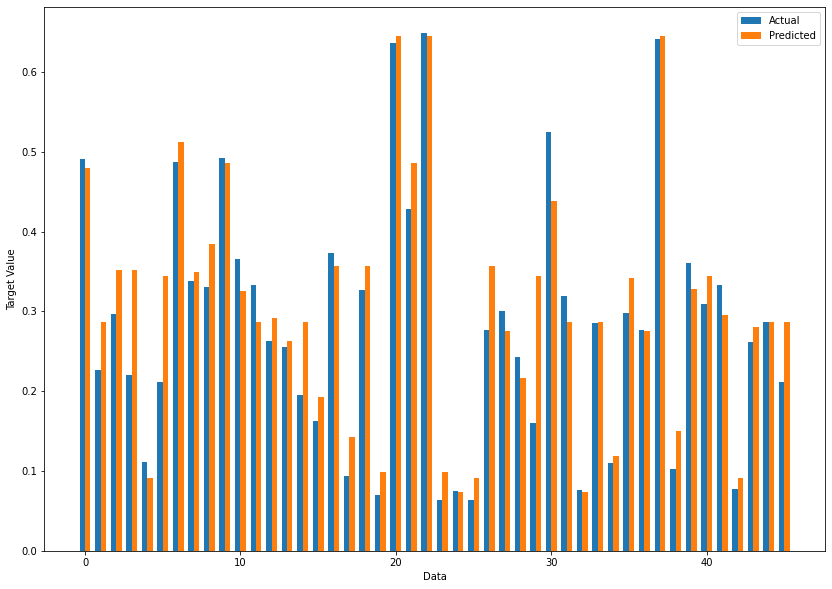

In [32]:
x = np.arange(len(y_test_knn))
width = 0.35
fig, ax = plt.subplots(figsize=(14,10))
rects1 = ax.bar(x - width/2, y_test_knn, width, label='Actual')
rects2 = ax.bar(x + width/2, y_pred_knn, width, label='Predicted')
ax.set_xlabel('Data')
ax.set_ylabel('Target Value')
ax.legend()
plt.show()

R-squared score:  0.8769286283421669


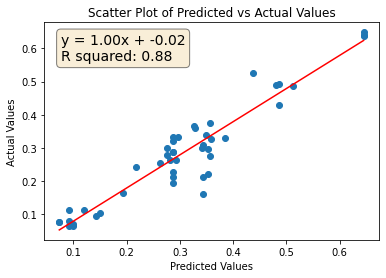

In [33]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(y_pred_knn, y_test_knn)

x = np.linspace(min(y_pred_knn), max(y_pred_knn), 2)
y_knn = slope * x + intercept
plt.plot(x, y_knn, '-r', label='Trend Line')

r2_knn = r2_score(y_test_knn, y_pred_knn)
print("R-squared score: ", r2_knn)

plt.scatter(y_pred_knn, y_test_knn)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.text(0.05, 0.95, f"y = {slope:.2f}x + {intercept:.2f}\nR squared: {r2_knn:.2f}", transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

# Simple ANN using Tensorflow

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [35]:
train_x = df[['Rotation Speed (rpm)', 'Traverse speed (mm/min)',
       'Traverse distance (mm)', 'Distance from Shoulder (mm)']]
train_y = df['Wear depth (average), mm']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train_ann *= 1000
y_train_ann *= 1000

In [39]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [40]:
model = Sequential()

model.add(Dense(81, input_shape=(4,), activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1))

2023-02-05 03:34:27.023801: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [41]:
model = Sequential()

model.add(Dense(18, input_shape=(4,), activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1))

In [42]:
optimizer = Adam(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=optimizer,)

model.fit(X_train_ann, y_train_ann, epochs=400, validation_data=(X_test_ann, y_test_ann), callbacks=[reduce_lr])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2023-02-05 03:34:27.309748: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
4/4 [==============================] - 1s 56ms/step - loss: 29096980480.0000 - val_loss: 2514.0537
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 3098129408.0000 - val_loss: 886.0250
Epoch 3/400
4/4 [==============================] - 0s 13ms/step - loss: 431222560.0000 - val_loss: 14.5994
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 6665127.0000 - val_loss: 0.1206
Epoch 5/400
4/4 [==============================] - 0s 10ms/step - loss: 501498.1562 - val_loss: 1.9417
Epoch 6/400
4/4 [==============================] - 0s 15ms/step - loss: 2357418.7500 - val_loss: 3.3792
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 3534768.2500 - val_loss: 3.7972
Epoch 8/400
4/4 [==============================] - 0s 10ms/step - loss: 3860222.7500 - val_loss: 3.6566
Epoch 9/400
4/4 [==============================] - 0s 12ms/step - loss: 3709328.5000 - val_loss: 3.2774
Epoch 10/400
4/4 [==============================] 

In [43]:
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_test_ann, y_test_ann)

2/2 [==============================] - 0s 5ms/step - loss: 0.4605


In [44]:
y_pred_ann = model.predict(X_test_ann)
y_pred_ann = y_pred_ann.reshape(-1,)

In [45]:
#y_test_ann

In [46]:
y_pred_ann

array([ 1.2099769 ,  0.38678658,  0.23213643,  0.23537144, -0.05556348,
        1.2141062 ,  1.2035055 ,  1.6127605 , -0.05556348,  0.22243017,
        0.8048523 ,  0.4061991 ,  1.1979299 ,  0.77986413,  0.38355154,
        0.6155422 , -0.05556348, -0.05556348, -0.05556348,  0.6284835 ,
       -0.05556348,  0.22566628, -0.05556348,  0.6317186 ,  1.0215613 ,
       -0.05556348, -0.05556348,  1.6030543 ,  1.0991303 ,  1.2172403 ,
       -0.05556348,  0.3964928 ,  1.018326  ,  0.40943414,  1.0118548 ,
       -0.05556348,  1.6062893 , -0.05556348,  0.7150509 ,  0.79604167,
        1.2108711 ,  0.81455845, -0.05556348, -0.05556348,  0.39325774,
        0.41256818], dtype=float32)

In [47]:
y_true = pd.Series(y_test_ann)
y_pred = pd.Series(y_pred_ann)

mse_ann = mean_squared_error(y_true, y_pred)
print("Mean Squared Error: ", mse_ann)

Mean Squared Error:  0.39818289769706433


In [48]:
mae_ann = metrics.mean_absolute_error(y_test_ann, y_pred_ann)
mae_ann

0.5192398984030536

In [49]:
mad_ann = np.mean(np.abs(y_test_ann - np.mean(y_pred_ann)))
mad_ann

0.2721423529583475

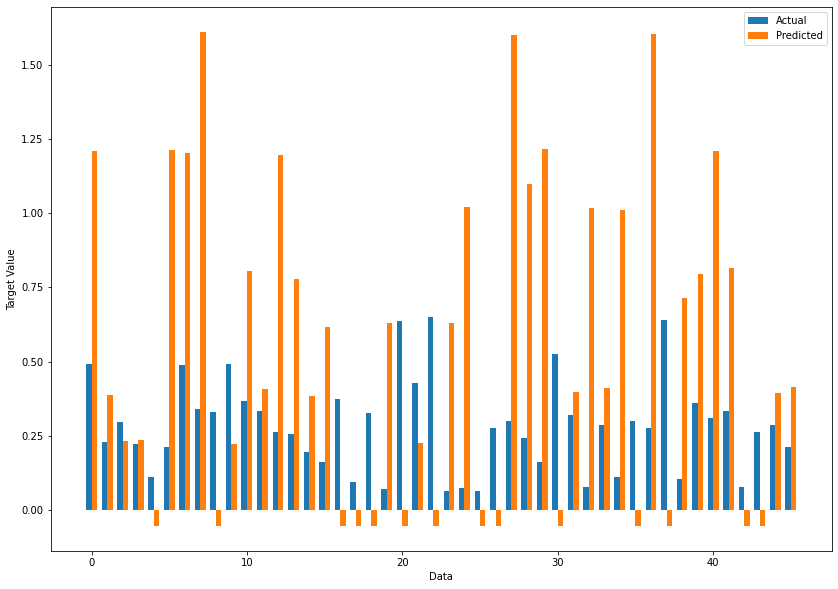

In [50]:
x = np.arange(len(y_test_ann))
width = 0.35
fig, ax = plt.subplots(figsize=(14,10))
rects1 = ax.bar(x - width/2, y_test_ann, width, label='Actual')
rects2 = ax.bar(x + width/2, y_pred_ann, width, label='Predicted')
ax.set_xlabel('Data')
ax.set_ylabel('Target Value')
ax.legend()
plt.show()

R-squared score:  -15.830391547911972


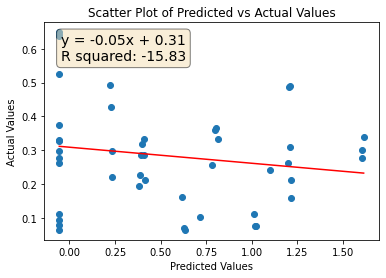

In [51]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(y_pred_ann, y_test_ann)

x = np.linspace(min(y_pred_ann), max(y_pred_ann), 2)
y_ann = slope * x + intercept
plt.plot(x, y_ann, '-r', label='Trend Line')

r2_ann = r2_score(y_test_ann, y_pred_ann)
print("R-squared score: ", r2_ann)

plt.scatter(y_pred_ann, y_test_ann)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.text(0.05, 0.95, f"y = {slope:.2f}x + {intercept:.2f}\nR squared: {r2_ann:.2f}", transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

# R^2 plot and different errors for different algos plot

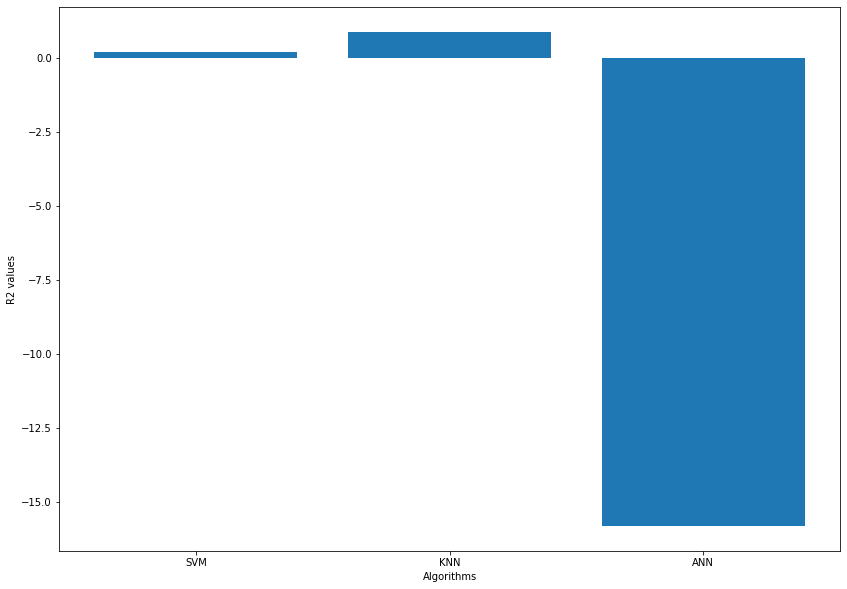

In [52]:
fig, ax = plt.subplots(figsize=(14,10))
algorithms = ['SVM', 'KNN', 'ANN']
r2_values = [r2_svm, r2_knn, r2_ann]
plt.bar(algorithms, r2_values)
plt.xlabel("Algorithms")
plt.ylabel("R2 values")
plt.show()

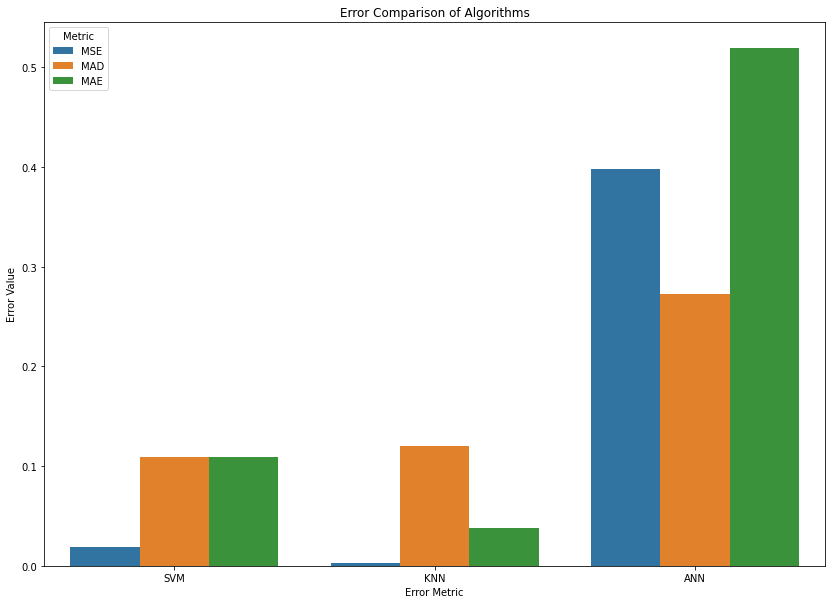

In [53]:
fig, ax = plt.subplots(figsize=(14,10))
errors = ['MSE', 'MAD', 'MAE']
svm = [mse_svm, mad_svm, mae_svm]
knn = [mse_knn, mad_knn, mae_knn]
ann = [mse_ann, mad_ann, mae_ann]

errors = [mse_svm, mse_knn, mse_ann, mad_svm, mad_knn, mad_ann, mae_svm, mae_knn, mae_ann]
errors = np.array(errors)

algorithms = ['SVM', 'KNN', 'ANN'] * 3
metrics = ['MSE'] * 3 + ['MAD'] * 3 + ['MAE'] * 3

df = pd.DataFrame({'Algorithm': algorithms, 'Metric': metrics, 'Value': errors})

ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df)
ax.set_title('Error Comparison of Algorithms')
ax.set_xlabel('Error Metric')
ax.set_ylabel('Error Value')
plt.show()